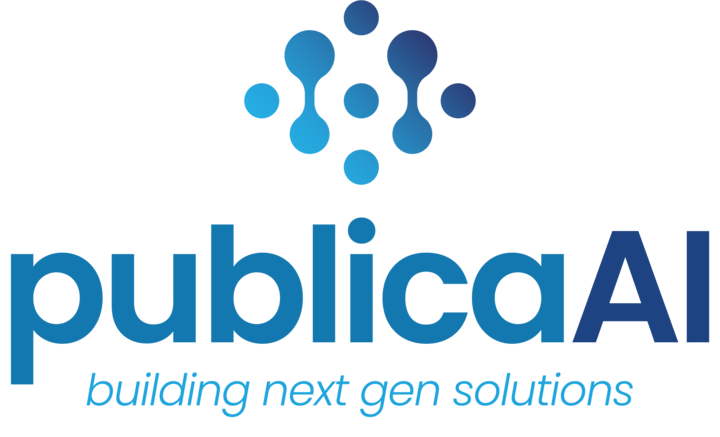

## VECTOR DATABASES AND RETRIEVAL ENGINES

Traditional databases (SQL, NoSQL) store and retrieve data using exact matches (e.g., key-value lookups or relational queries). Vector databases, on the other hand, store data as high-dimensional numerical representations (vectors) and enable approximate nearest neighbor (ANN) search, vital for AI applications such as:

- Semantic Search (e.g., Google Search, AI-powered enterprise search)

- Recommendation Systems (e.g., Netflix, Spotify)

- Computer Vision (e.g., facial recognition)

- Retrieval-Augmented Generation (RAG) for LLMs

Example:
Instead of searching for "best laptop under $1000" by keyword match, a vector database finds products semantically similar to the user's intent.

Every text, image, audio, or video can be represented as a vector in a multi-dimensional space. These vectors capture semantic meaning (e.g., "cat" and "feline" are closer than "cat" and "car"). The distance metric (e.g., cosine similarity, Euclidean distance) determines how close two vectors are.

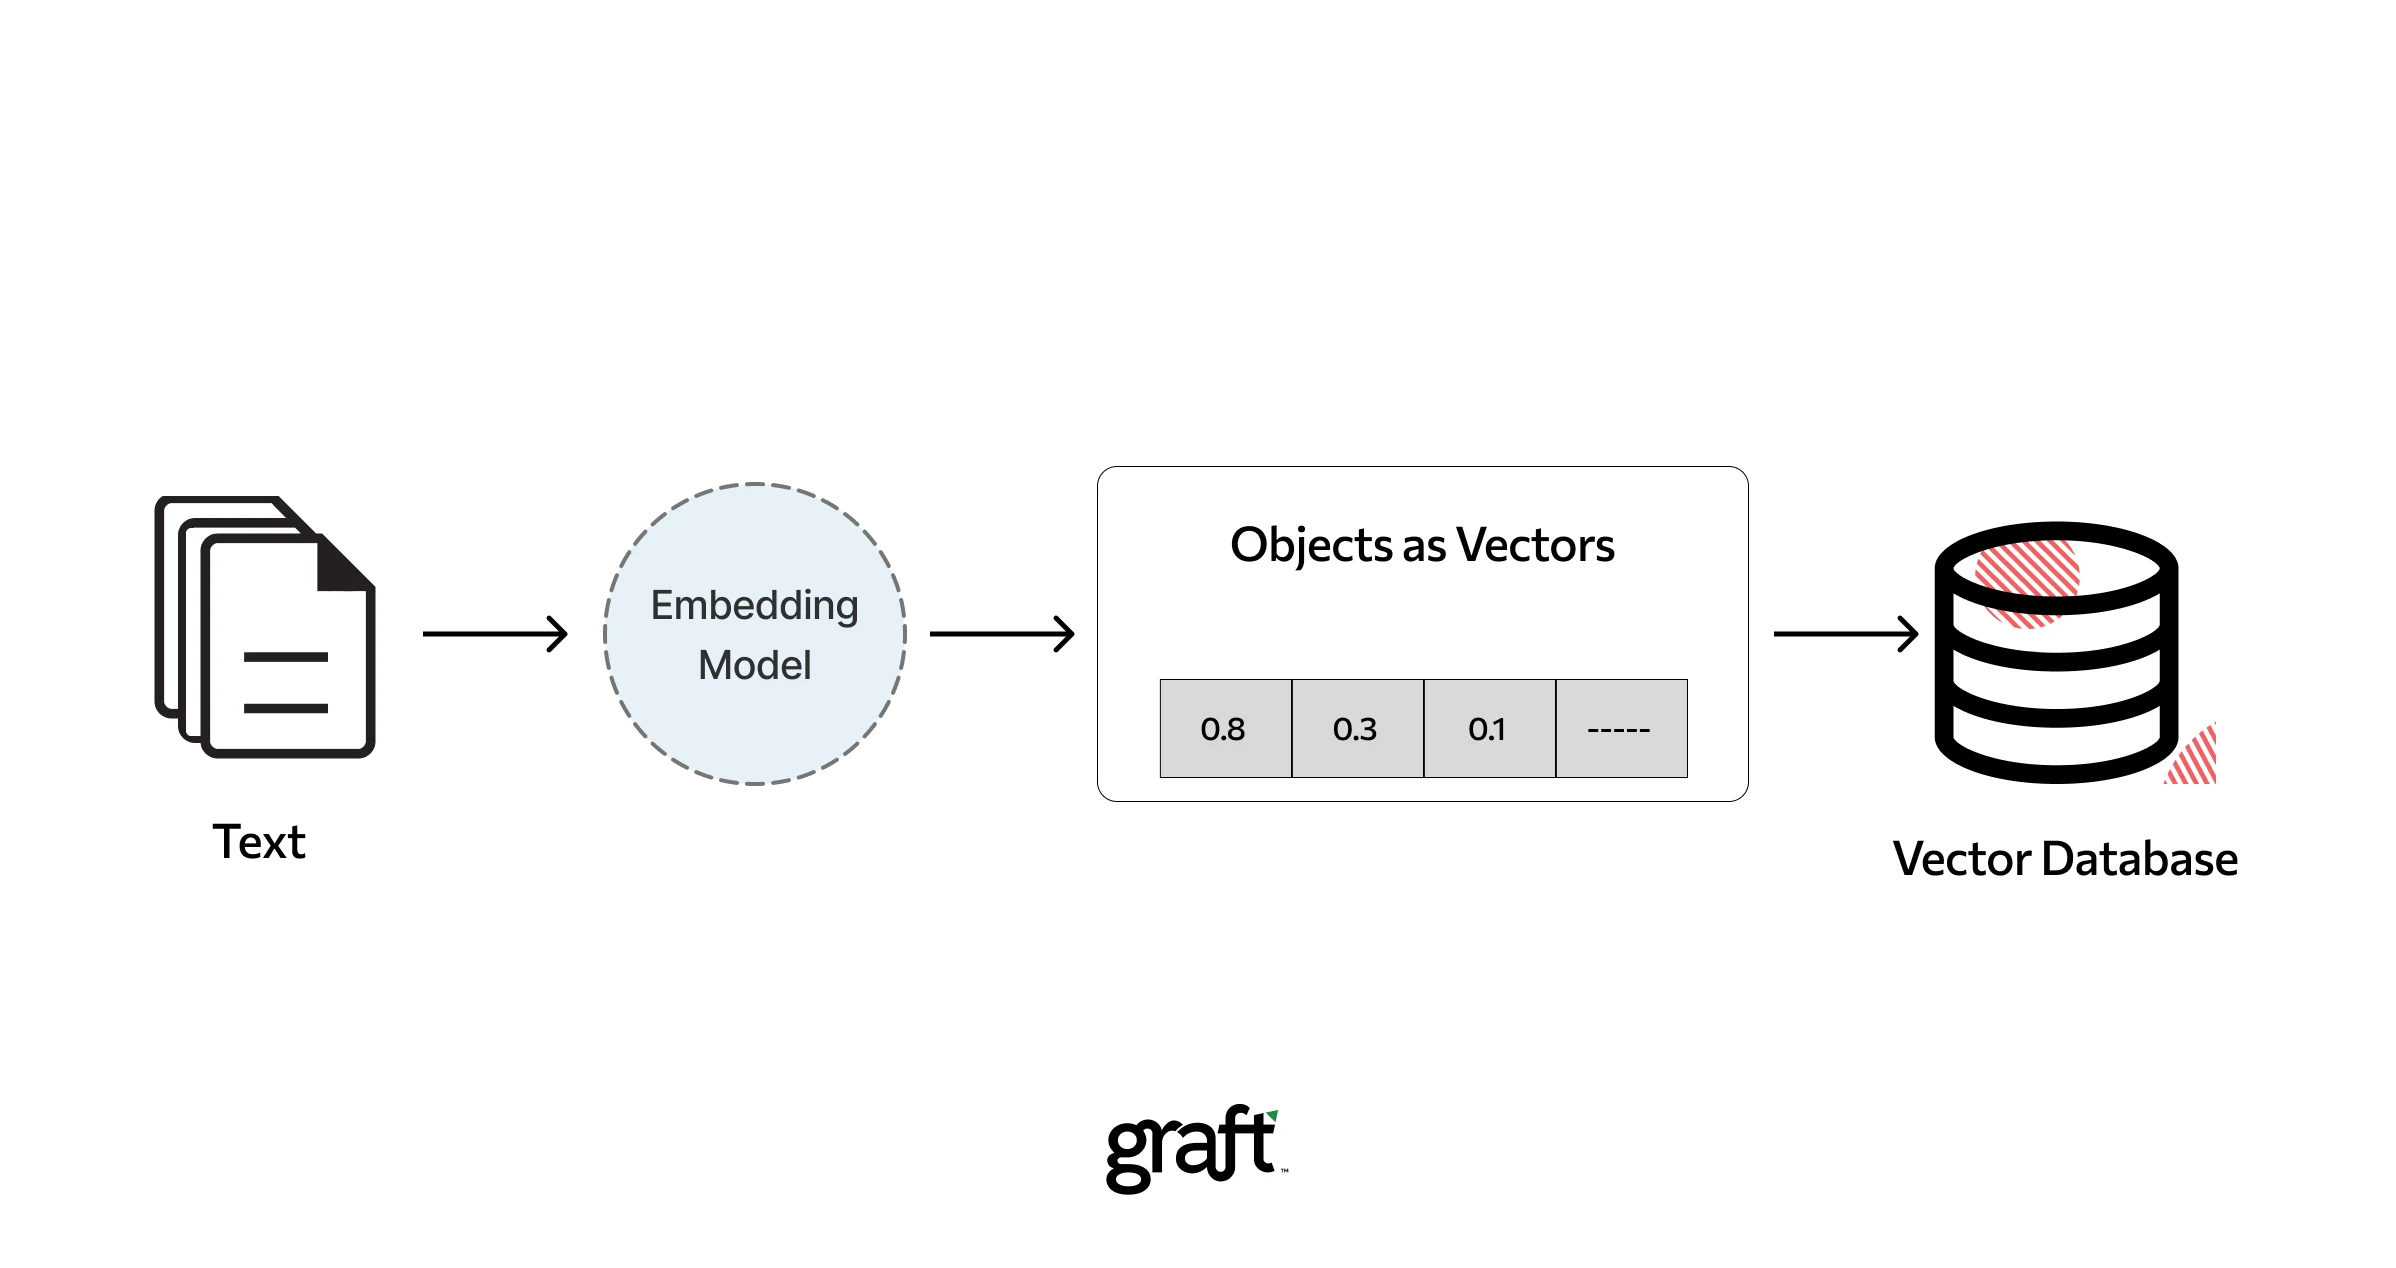

  Since we have seen how to create embeddings, we will now utilize  our knowledge to create embeddings and store them inside a vector DB

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
# Load pre-trained model
model = SentenceTransformer("all-MiniLM-L6-v2")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:

# Example sentences
sentences = ["I love machine learning", "AI is amazing", "The weather is nice today"]

In [ ]:

# Generate embeddings
embeddings = model.encode(sentences)


In [ ]:
embeddings

array([[-0.04363641, -0.05905437,  0.08201229, ...,  0.09771024,
         0.0168808 , -0.09040586],
       [-0.05198846, -0.0673001 ,  0.033983  , ...,  0.05055432,
         0.01190242, -0.00150107],
       [-0.03628493,  0.09088083,  0.14121287, ..., -0.00886365,
        -0.11721423,  0.06380134]], dtype=float32)

In [ ]:
# Print first 5 values of each embedding
for sentence, embedding in zip(sentences, embeddings):
    print(f"Sentence: {sentence}\nEmbedding: {embedding[:5]}... (truncated)\n")

Sentence: I love machine learning
Embedding: [-0.04363641 -0.05905437  0.08201229 -0.01076715  0.06119591]... (truncated)

Sentence: AI is amazing
Embedding: [-0.05198846 -0.0673001   0.033983   -0.04232056  0.01524859]... (truncated)

Sentence: The weather is nice today
Embedding: [-0.03628493  0.09088083  0.14121287  0.06306534  0.00622857]... (truncated)



#### Types of Vector Databases

Vector databases fall into three main categories:

## Types of Vector Databases

Vector databases fall into three main categories:

| Type                | Examples                          | Pros                                | Cons               |
|---------------------|---------------------------------|------------------------------------|--------------------|
| **Managed**        | Pinecone, Weaviate, Qdrant      | Scalable, managed infrastructure  | Paid service      |
| **Self-Hosted**    | Chroma, FAISS, Milvus           | Full control, cost-efficient      | Complex setup     |
| **Hybrid SQL + Vector** | pgvector (PostgreSQL), Elasticsearch | SQL compatibility, easy integration | Limited scaling  |


1. Managed Vector Databases (e.g., Pinecone, Weaviate)

- Cloud-based solutions with automatic scaling and low maintenance.

- Ideal for production-ready AI applications.

2. Self-Hosted & Open-Source (e.g., Chroma, FAISS, Milvus)

- You can host it on-premise or in the cloud.

3. Hybrid SQL + Vector DBs (e.g., PostgreSQL with pgvector)

- Great for applications that already use relational databases and want to add vector search capabilities.

## Creating a Vector Database Using ChromaDB

ChromaDB is an open-source, lightweight, and Python-friendly vector database that works well with LLMs and AI applications. It supports persistent storage and metadata filtering.

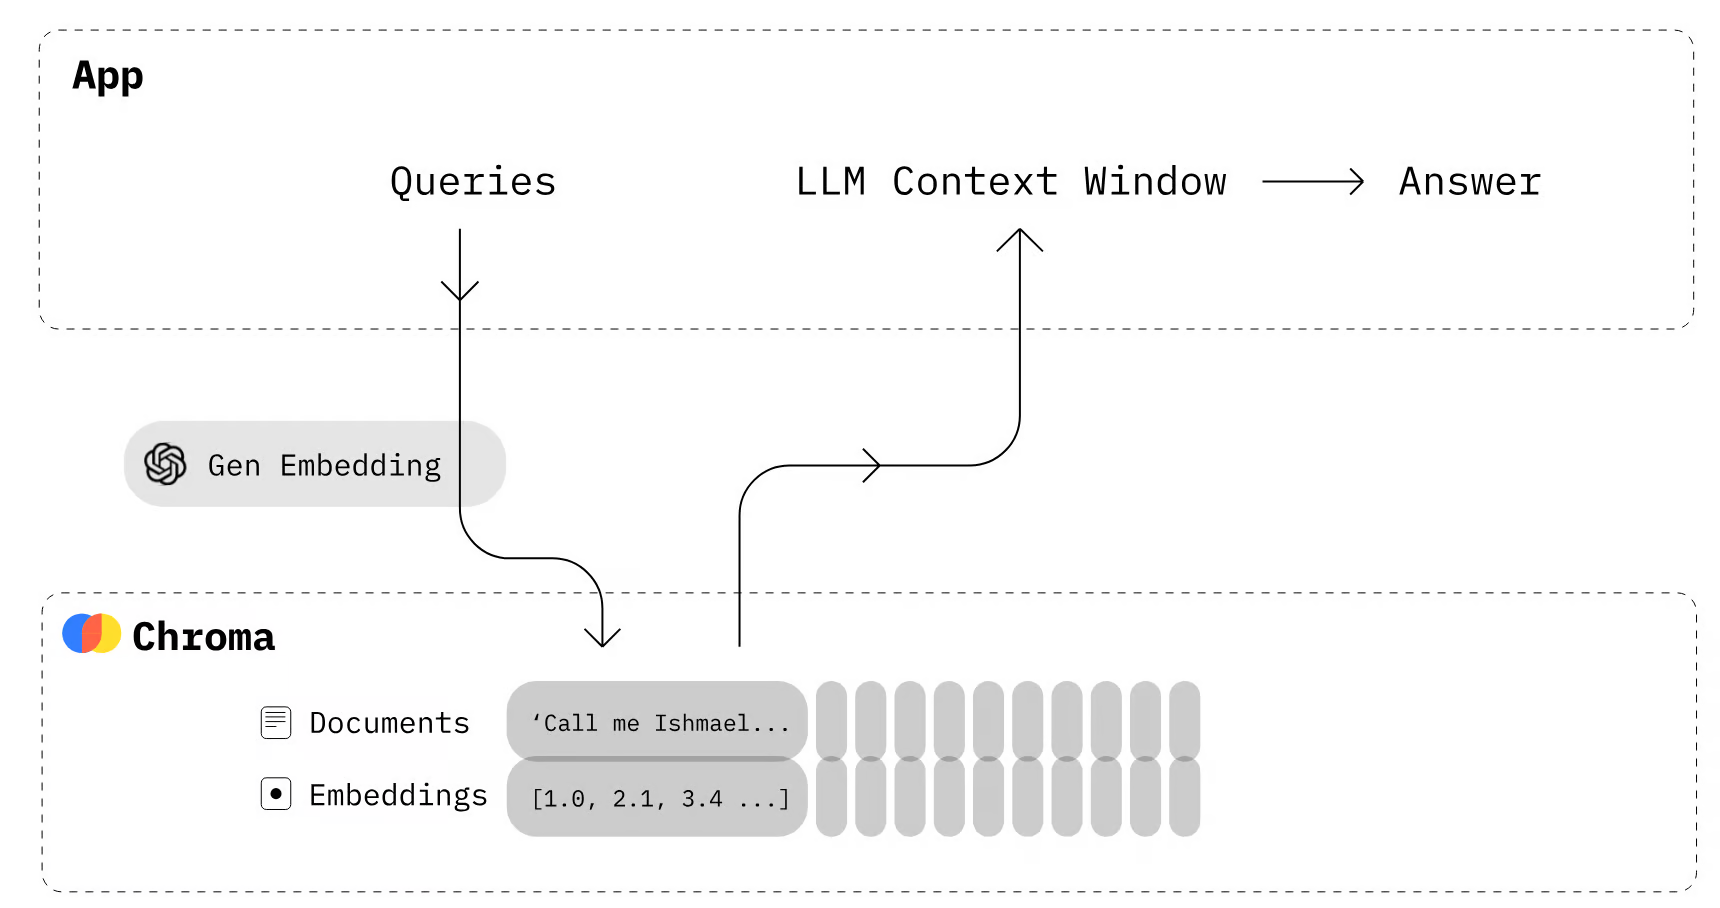

In [ ]:
! pip install chromadb

In [25]:
import chromadb

In [27]:
# Initialize ChromaDB client
chroma_client = chromadb.PersistentClient(path=".file/chroma_db")

In [30]:
# Create a collection
collection = chroma_client.get_or_create_collection(name="my_collection")

In [31]:
# Adding data with embeddings
collection.add(
    ids=["1", "2", "3"],
    documents=["I love AI", "Machine learning is amazing", "Deep learning is powerful"],
    embeddings=embeddings.tolist()
    )

## Querying and Updating a Vector Database

Querying for Similarity Search:

In [33]:
results = collection.get(ids=["1", "2", "3"], include=["embeddings"])
print(results)

{'ids': ['1', '2', '3'], 'embeddings': array([[-0.04363641, -0.05905437,  0.08201229, ...,  0.09771024,
         0.0168808 , -0.09040586],
       [-0.05198846, -0.0673001 ,  0.033983  , ...,  0.05055432,
         0.01190242, -0.00150107],
       [-0.03628493,  0.09088083,  0.14121287, ..., -0.00886365,
        -0.11721423,  0.06380134]]), 'documents': None, 'uris': None, 'data': None, 'metadatas': None, 'included': [<IncludeEnum.embeddings: 'embeddings'>]}


In [38]:
# Perform a similarity search
results = collection.query(query_texts=["AI is fascinating"], n_results=2)
print(results)

{'ids': [['2', '1']], 'embeddings': None, 'documents': [['Machine learning is amazing', 'I love AI']], 'uris': None, 'data': None, 'metadatas': [[None, None]], 'distances': [[0.3239759391776948, 0.7890144121896704]], 'included': [<IncludeEnum.distances: 'distances'>, <IncludeEnum.documents: 'documents'>, <IncludeEnum.metadatas: 'metadatas'>]}


Updating a stored Vector Store:

In [39]:
# Update a document in the database
collection.update(
    ids=["1"],
    documents=["I absolutely love AI"]
)

In [42]:
results = collection.query(query_texts=["AI is fascinating"], n_results=2)
print(results)

{'ids': [['2', '1']], 'embeddings': None, 'documents': [['Machine learning is amazing', 'I absolutely love AI']], 'uris': None, 'data': None, 'metadatas': [[None, None]], 'distances': [[0.3239759391776948, 0.4807392422771809]], 'included': [<IncludeEnum.distances: 'distances'>, <IncludeEnum.documents: 'documents'>, <IncludeEnum.metadatas: 'metadatas'>]}


## Vector Databases for RAG (Retrieval-Augmented Generation) using Langchain

LLMs lack persistent memory as they can only process limited context. Vector DBs help by retrieving relevant documents before prompting the LLM to improveaccuracy and factuality.

RAG Workflow:

- Store text documents as vector embeddings.

- Convert the user query into a vector.

- Retrieve the most relevant documents using vector similarity search.

- Pass retrieved documents to LLM to generate a response.

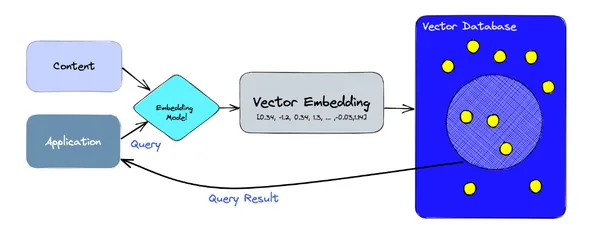

In [44]:
! pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.7 MB/s eta 0:00:00


In [56]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.3 MB/s eta 0:00:00


In [70]:
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings
import openai
from langchain.schema import Document

In [49]:
openai.api_key = ""

In [51]:
# Initialize embedding model
embedding_function = OpenAIEmbeddings(model="text-embedding-ada-002", api_key = openai.api_key)


In [73]:
# Load ChromaDB with embeddings
vector_store = Chroma(persist_directory="./open/chroma_db", embedding_function=embedding_function)

In [74]:
vector_store

In [75]:
documents = [
    Document(page_content="I love artificial intelligence and machine learning."),
    Document(page_content="Deep learning is a subset of machine learning."),
    Document(page_content="AI is transforming the world with new innovations."),
]

# Add to ChromaDB
vector_store.add_documents(documents)


['2bd485b8-6916-4502-b701-18a84a29dd5e',
 'fdb374dd-ec8f-4764-bc6f-20d6f12a6cd4',
 '60980a0b-460f-4161-b071-6047c19b9c05']

In [80]:
# Query the vector database
retrieved_docs = vector_store.similarity_search("Explain deep learning", k=2)


In [81]:
# Print results
for doc in retrieved_docs:
    print(f"Retrieved Document: {doc.page_content}")

Retrieved Document: Deep learning is a subset of machine learning.
Retrieved Document: I love artificial intelligence and machine learning.


## Metadata in Chroma Store

In ChromaDB, metadata refers to additional information stored alongside vector embeddings. It helps with filtering, organizing, and retrieving relevant documents more effectively.

Metadata enables the following

- Filtering Results – Retrieve vectors based on specific criteria, not just similarity.
- Faster Queries – Indexing metadata can speed up retrieval.
- Better Organization – Useful for categorizing and tagging data

#### Using Metadata with the Chroma Store

***NB: Each document can have metadata such as category, timestamp, author, source, etc.***

In [82]:
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings


In [84]:
# Initialize embedding model
embedding_function = OpenAIEmbeddings(model="text-embedding-ada-002", api_key=openai.api_key)

In [85]:
# Initialize ChromaDB
vector_store = Chroma(persist_directory="./NEW/chroma_db", embedding_function=embedding_function)

In [86]:

# Sample documents with metadata
documents = [
    {"id": "1", "text": "Artificial Intelligence is transforming the world.", "metadata": {"category": "AI", "author": "John"}},
    {"id": "2", "text": "Machine Learning is a subset of AI.", "metadata": {"category": "ML", "author": "Alice"}},
    {"id": "3", "text": "The sun is a star.", "metadata": {"category": "Science", "author": "Bob"}}
]



In [87]:
# Add documents to ChromaDB
vector_store.add_texts(
    ids = [doc["id"] for doc in documents],
    texts=[doc["text"] for doc in documents],
    metadatas=[doc["metadata"] for doc in documents]
)

['1', '2', '3']

#### Querying with Metadata Filtering

***We can retrieve vectors based on both similarity and metadata filters.***

In [88]:
# Search for similar documents but only in "AI" category
results = vector_store.similarity_search("Tell me about AI", k=2, filter={"category": "AI"})


In [89]:
for doc in results:
    print(doc.page_content, doc.metadata)

Artificial Intelligence is transforming the world. {'author': 'John', 'category': 'AI'}


Here,

- "Tell me about AI" → Converts query into an embedding.
- k=2 → Returns the top 2 most similar documents.
- filter={"category": "AI"} → Restricts results to documents tagged with: "category": "AI"

#### Query by turning into retriever

You can also transform the vector store into a retriever for easier usage

In [91]:
retriever = vector_store.as_retriever(search_kwargs={"k": 1}
)
retriever.invoke("Will AI takeover your Job", filter={"category": "AI"})

[Document(metadata={'author': 'John', 'category': 'AI'}, page_content='Artificial Intelligence is transforming the world.')]

#### Update items in vector store

Now that we have added documents to our vector store, we can update existing documents by using the `update_documents` function.

In [100]:
# Sample documents with metadata
documents1 = [
    {"id": "1", "text": "Artificial Intelligence is transforming the world we live in.", "metadata": {"category": "AI", "author": "John"}}
]

In [102]:
text = [doc["text"] for doc in documents1]

In [104]:
id = [doc["id"] for doc in documents1]

In [106]:
metadata = [doc["metadata"] for doc in documents1]

In [109]:
# Re-add the updated document
vector_store.add_texts(
    ids=id ,
    texts= text ,
    metadatas=metadata
)
# You can also update multiple documents at once by using a list

['1']

In [110]:
retriever = vector_store.as_retriever(search_kwargs={"k": 1}
)
retriever.invoke("Will AI takeover your Job", filter={"category": "AI"})

[Document(metadata={'author': 'John', 'category': 'AI'}, page_content='Artificial Intelligence is transforming the world we live in.')]

In [111]:
results = vector_store.similarity_search("What is AI?", k=1, filter={"author": "John"})
results


[Document(metadata={'author': 'John', 'category': 'AI'}, page_content='Artificial Intelligence is transforming the world we live in.')]

This will only return results written by "John" that are similar to the query.

### *Congratulations on getting to the end of this course. See you........*